In [1]:
%cd C:\\Users\\Nicholas.Hopewell\\Desktop\\AASC\\

C:\Users\Nicholas.Hopewell\Desktop\AASC


This is a small example of pyanon using a fake dataset

In [2]:
from json import dumps
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import export_text
from sklearn.preprocessing import OneHotEncoder
from pyanon.pyanon.anonymizer import Anonymizer
import pyanon.pyanon.anonymizer_h as helper

## Read in unmasked data

In [3]:
df = helper.make_fake_data()
df

,Vertebrate Name,Body Temperature,Skin Cover,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class Label
0,human,warm-blooded,hair,yes,no,no,yes,no,mammal
1,python,cold-blooded,scales,no,no,no,no,yes,non-mammal
2,salmon,cold-blooded,scales,no,yes,no,no,no,non-mammal
3,whale,warm-blooded,hair,yes,yes,no,no,no,mammal
4,frog,cold-blooded,none,no,semi,no,yes,yes,non-mammal
5,komodo-dragon,cold-blooded,scales,no,no,no,yes,no,non-mammal
6,bat,warm-blooded,hair,yes,no,yes,yes,yes,mammal
7,pigeon,warm-blooded,feathers,no,no,yes,yes,no,non-mammal
8,cat,warm-blooded,fur,yes,no,no,yes,no,mammal
9,leopard,cold-blooded,scales,yes,yes,no,no,no,non-mammal


### Unmasked Tree


In [4]:
enc = OneHotEncoder(sparse=False)

lab = 'Class Label'

X =  helper.cat_convert_all(
            df.drop(lab, axis=1)
    )

enc.fit(X)

X = enc.transform(X)

y = df[lab]

In [5]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

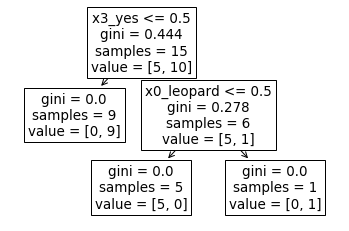

In [6]:
masked_tree = tree.plot_tree(clf, feature_names = enc.get_feature_names())
plt.show()

## Mask data

In [7]:
anon = Anonymizer()

In [8]:
df_masked = anon.encode_data(df, build_val_map=True)

**Note** This anonymization is includues a lot of randomized computing every time it ran. The data (as well as the key) will look completely different every time the data is encoded. The data cannot be decoded without the same key that was generated at the time of encoding. It you try tio decode with a different key it will not work.

In [9]:
df_masked

,0I5j5N3Q1L6K,0F0e5I5d8M,7W7n0p1f,D3B1m3Y8t2,1V0b4t6b1a3w,u3D6K2,2q3r6p1A0S4Q,1I9h6d9P,1B9z5D8v7t9E
6,3,4,7,5,2,6,7,5,4
4,4,3,7,4,5,5,8,6,4
0,3,3,6,5,6,6,7,5,4
13,5,3,6,4,4,5,10,6,3
3,5,3,6,5,16,6,7,5,3
1,3,3,7,4,12,5,10,6,3
2,5,3,6,4,14,5,10,6,3
11,4,3,6,4,9,6,5,6,4
5,3,3,6,4,7,5,10,6,4
8,3,3,6,5,3,6,6,5,4


### Masked Tree

In [10]:
lab = anon.key['col_map']['Class Label']

enc = OneHotEncoder(sparse=False)

X =  helper.cat_convert_all(
            df_masked.drop(lab, axis=1)
        )

enc.fit(X)

X = enc.transform(X)

y = df_masked[lab]

C:\Users\Nicholas.Hopewell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [11]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

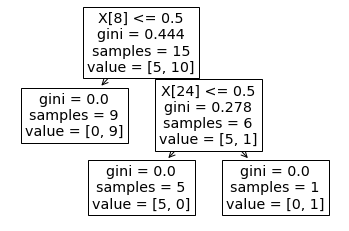

In [12]:
masked_tree = tree.plot_tree(clf)
plt.show()

### Dump key

In [13]:
anon.dump_key('test1', 'C:\\Users\\Nicholas.Hopewell\\Desktop')

### Retrieve key

In [14]:
anon_2 = Anonymizer()

anon_2.retrieve_key('test1', 'C:\\Users\\Nicholas.Hopewell\\Desktop')

## Unmasked masked data with key

In [15]:
df2 = anon_2.decode_data(df_masked)

In [16]:
df2

,Vertebrate Name,Body Temperature,Skin Cover,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class Label
0,human,warm-blooded,hair,yes,no,no,yes,no,mammal
1,python,cold-blooded,scales,no,no,no,no,yes,non-mammal
2,salmon,cold-blooded,scales,no,yes,no,no,no,non-mammal
3,whale,warm-blooded,hair,yes,yes,no,no,no,mammal
4,frog,cold-blooded,none,no,semi,no,yes,yes,non-mammal
5,komodo-dragon,cold-blooded,scales,no,no,no,yes,no,non-mammal
6,bat,warm-blooded,hair,yes,no,yes,yes,yes,mammal
7,pigeon,warm-blooded,feathers,no,no,yes,yes,no,non-mammal
8,cat,warm-blooded,fur,yes,no,no,yes,no,mammal
9,leopard,cold-blooded,scales,yes,yes,no,no,no,non-mammal
